# Demo of the LAMINAR package

In [1]:
import LAMINAR

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=1500, noise=0.1)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([1500, 2])

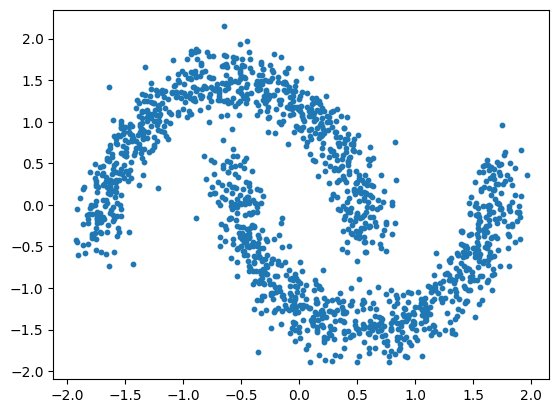

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10);

In [4]:
# initialize the LAM class

hyperparameters = {
    'hidden_dim': 32,
    'width': 64,
    'timesteps': 50,
    'learning_rate': 5e-3,
    'patience': 50,
    'sig': 3,
    'batch_size': 256,
}

LAM = LAMINAR.LAMINAR(data, epochs=500, k_neighbours=20, hyperparameters=hyperparameters)

LAM.p_value()

Epoch 445 | Loss: 1.8300:  89%|████████▉ | 444/500 [13:47<01:44,  1.86s/it]


Early stopping at epoch 445


Calculating Distances: 100%|██████████| 1500/1500 [00:04<00:00, 355.87it/s]


Henze-Zirkler p-value:	0.6981674182696382


0.6981674182696382

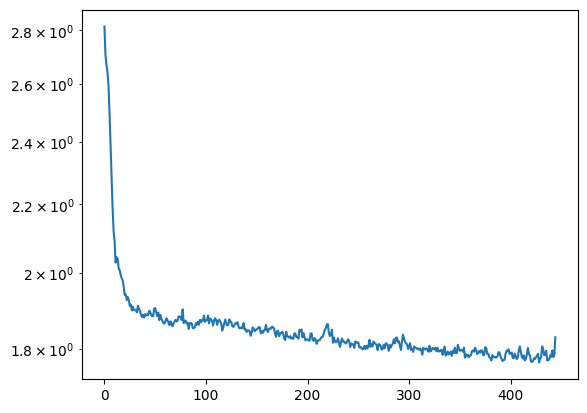

In [5]:
plt.plot(LAM.loss_history)
plt.yscale('log')

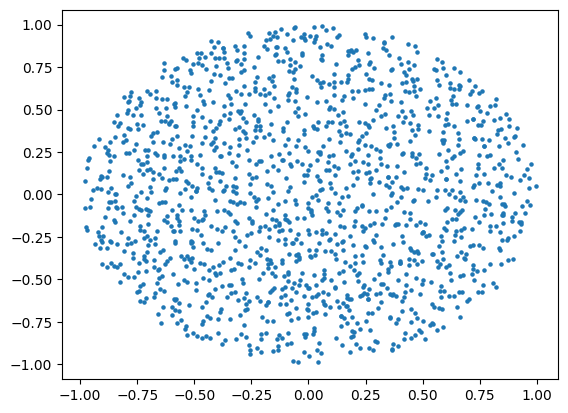

In [6]:
# visualize the pushed data
plt.scatter(LAM.data_pushed[:, 0], LAM.data_pushed[:, 1], s=5);

In [7]:
# default nearest neighbours of point with index 0
LAM.query(0)

([array([   0,  722,  784,  409, 1336,  249,  162,  726,  386,  854,  373,
          549,  600,  281, 1245, 1207,  927,  513, 1232, 1263], dtype=int64)],
 [array([0.        , 0.07175858, 0.07853278, 0.08339409, 0.08843217,
         0.08865766, 0.09373356, 0.09674998, 0.10722968, 0.10837482,
         0.10887144, 0.11135246, 0.12460215, 0.1248228 , 0.12543834,
         0.12603767, 0.12886896, 0.12936972, 0.13707313, 0.13791222])])

In [8]:
# query the 5 nearest neighbours of the points [0, 2, 5]
LAM.query(np.array([0, 2, 5]) , k_neighbours=5)

([array([   0,  722,  784,  409, 1336], dtype=int64),
  array([   2, 1002, 1458,  515,  358], dtype=int64),
  array([   5,  358,  515, 1250, 1088], dtype=int64)],
 [array([0.        , 0.07175858, 0.07853278, 0.08339409, 0.08843217]),
  array([0.        , 0.02054766, 0.03631545, 0.03704565, 0.04282616]),
  array([0.        , 0.22004065, 0.23685749, 0.25074556, 0.25142597])])

In [9]:
# calculate the distance between the points 0 and p
p = 5
dist = LAM.distance(0, p, return_path=False)
print(dist)

[1.99024051]


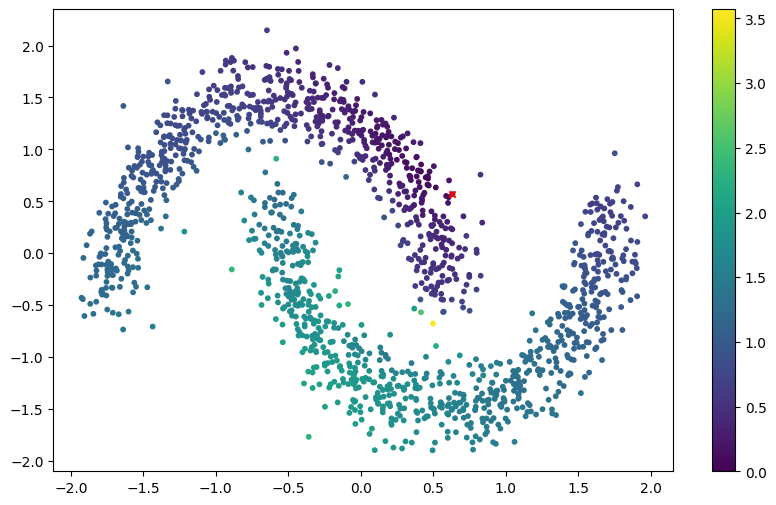

In [10]:
# calculate the distance to all points from the point 0 and plot

dist = LAM.distance(0)

fig, ax = plt.subplots(figsize=(10, 6))

plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
plt.colorbar(plot)
plt.show()

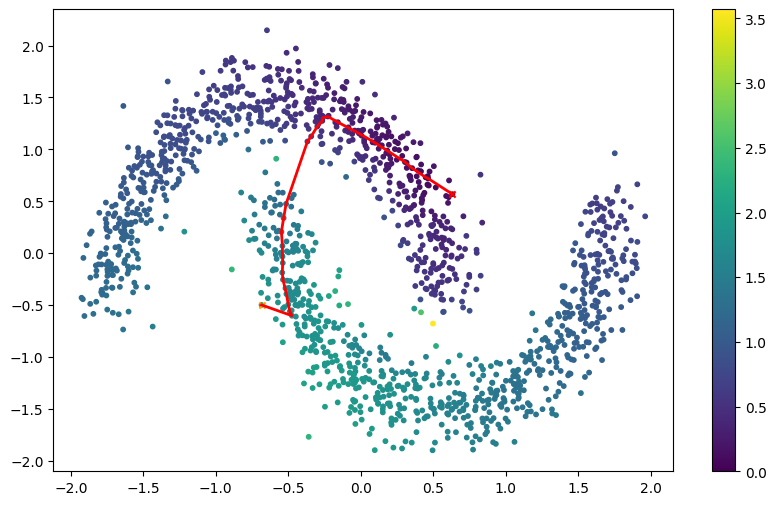

In [11]:
start_point = 0
end_point = p

_, path = LAM.distance(start_point, end_point, return_path=True)

fig, ax = plt.subplots(figsize=(10, 6))
plot = ax.scatter(X[:, 0], X[:, 1], c=dist, cmap='viridis', s=10, vmin=0, vmax=dist.max())
# plot the path, consider that the entries in path are points
ax.plot(path[:,0], path[:,1], c='r', linewidth=2)
ax.scatter(X[0, 0], X[0, 1], c='r', s=20, marker='x')
ax.scatter(X[p, 0], X[p, 1], c='orange', s=20, marker='x')
plt.colorbar(plot)
plt.show()